## Bayesian linear regression (known error precision)

###### Assumptions: polynomial basis functions, scalar output, scalar input, error precision known
###### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com

In [1]:
#!/usr/bin/python
import numpy as np
import numpy.linalg as la
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, math, sys

#### Model definition (basis functions)

In [2]:
polyPower = [0,1,2,3,4,5] # powers of polynomial basis
N = len(polyPower) # number of basis
def basisFun(Xth,ith):
    return Xth**polyPower[ith]

#### Known parameters

In [3]:
m0 = np.ones(N)*0 # prior mean
RHO = 25 # initial error precision
alpha = [1e-02]*N # hyper-parameter value for others (for N>2)
#pl.rcParams.update({'font.size':14})

In [4]:
Niter = 50
i1 = 0
i2 = 1
Pi1 = np.linspace(-4,6,Niter)
Pi2 = np.linspace(-4,6,Niter)
Pmsh = np.zeros((N*N,2))
P1,P2 = np.meshgrid(Pi1,Pi2)

#### Generate design matrix 

In [5]:
Yobs = np.loadtxt('Ydata.dat') 
Xobs = np.loadtxt('Xdata.dat')
M = len(Yobs)
Phi = np.zeros((M,N))
for i in range(0,M):
    for j in range(0,N):
        Phi[i,j] = basisFun(Xobs[i],j)

#### Bayesian linear regression update

In [6]:
logEvid = np.zeros((Niter,Niter))
gof = np.zeros((Niter,Niter))
for i in range(0,Niter):
    for j in range(Niter):
        #alpha[2] = 1e+02
        alpha[i1] = np.power(10.0,P1[i,j])
        alpha[i2] = np.power(10.0,P2[i,j])
        GAMinv = np.identity(M)*RHO
        P0inv = np.diag(alpha)
        P0 = la.inv(P0inv)
        PMLEinv = np.matmul(np.matmul(np.transpose(Phi),GAMinv),Phi)
        Wmle = np.matmul(np.matmul(np.matmul(la.inv(PMLEinv),np.transpose(Phi)),GAMinv),Yobs)
        Pinv = P0inv + PMLEinv
        P = la.inv(Pinv) 
        m = np.matmul(P,np.matmul(P0inv,m0) + np.matmul(PMLEinv,Wmle))
        B = np.matmul(Phi,np.matmul(P0,np.transpose(Phi))) + la.inv(GAMinv)
        logEvid[i,j] = np.log(st.multivariate_normal.pdf(Yobs,np.matmul(Phi,m0),B))
        gof[i,j] = st.multivariate_normal.pdf(Yobs,np.matmul(Phi,m),np.identity(M)/RHO)
        u1,s1,v1 = la.svd(PMLEinv)
        u2,s2,v2 = la.svd(Pinv)
        resNormMLE = la.norm(Yobs-np.matmul(Phi,Wmle))
        resNormMAP = la.norm(Yobs-np.matmul(Phi,m))

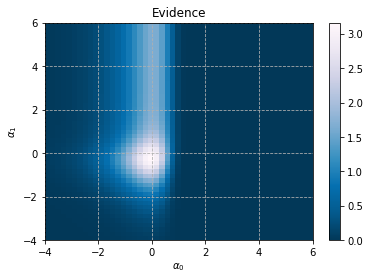

In [7]:
fig=plt.figure(3)
#plt.pcolor(P1,P2,reshape(Yord,(N,N)),cmap='RdBu',vmin=0.28,vmax=0.38)
#plt.pcolor(P1,P2,logEvid,cmap='PuBu_r')
plt.pcolor(P1,P2,np.exp(logEvid),cmap='PuBu_r')
plt.colorbar()
plt.grid('on',linestyle='--')
plt.xlabel(r'$\alpha_{'+str(i1)+'}$')
plt.ylabel(r'$\alpha_{'+str(i2)+'}$')
plt.title('Evidence')
plt.savefig('1_alphaVSevid.jpg',bbox_inches='tight')